# Is it possible to predict the price of an AirBnB accommodation based on other features?

In [2]:
import os
import sklearn
#Sorting an error with BaseMap
os.environ['PROJ_LIB'] = 'C:\\Users\\Danie\\Anaconda3\\pkgs\\proj4-5.2.0-ha925a31_1\\Library\\share'
from mpl_toolkits.basemap import Basemap, cm
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
sns.set(style="white")

sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

data = pd.read_excel('C:\\Users\\Danie\\OneDrive - University of Strathclyde\\Finance Project\\daniel_sloan.xlsx')

#Hiding warning messages for improved presentation
import warnings
warnings.filterwarnings('ignore')

# Data Exploration 

In [3]:
#Taking a look at the data
data.head()

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI,Google trends
0,2019-05-02,5402.42,5.400366e+07,1.126911,516500.0,439549,6.353030e+12,65.625219,8.710334e+08,NaN,160.85,73.68,271.97,0.069020,8036.770020,26307.789063,NaN
1,2019-05-01,5350.91,4.421352e+07,1.295071,551918.0,346486,6.353030e+12,85.484635,8.256662e+08,NaN,162.19,74.30,267.99,0.070338,8049.640137,26430.140625,NaN
2,2019-04-30,5247.73,5.147717e+07,1.203268,529709.0,363207,6.353030e+12,70.954700,8.838533e+08,NaN,155.17,67.95,237.57,0.064661,8095.390137,26592.910156,NaN
3,2019-04-29,5284.86,5.147717e+07,0.977574,406877.0,383291,6.353030e+12,47.953930,4.371152e+08,NaN,157.29,69.78,255.55,0.068620,8161.850098,26554.390625,NaN
4,2019-04-28,5271.75,4.326609e+07,1.170310,421593.0,359008,6.353030e+12,54.420927,4.530519e+08,NaN,158.50,72.12,264.12,0.070189,NaN,NaN,NaN


In [4]:
data.describe()

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
count,3732.000000,3.731000e+03,3732.000000,3.724000e+03,3732.000000,3.732000e+03,3732.000000,3.732000e+03,2660.000000,1356.000000,2725.000000,646.000000,576.000000,2570.000000,2570.000000
mean,1410.231592,5.770534e+06,0.376481,2.030792e+05,108018.973205,7.851725e+11,50.869158,2.541152e+08,1304.666316,205.232756,25.928037,745.312570,0.164260,4236.322852,16145.892578
std,2830.209487,1.328853e+07,0.390893,2.151034e+05,111329.242808,1.823258e+12,106.093123,5.722561e+08,207.329139,264.001372,49.035779,627.015641,0.183717,1800.834827,5061.070587
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,810.000000,0.000000,0.000000,77.370000,0.018414,1268.640015,6547.049805
25%,0.000000,8.161653e+00,0.016514,1.015675e+04,5653.250000,1.159929e+06,4.261553,4.463355e+05,1195.000000,10.535000,1.840000,305.357500,0.044131,2702.712525,12093.152832
50%,237.015000,2.815852e+04,0.191291,1.325365e+05,63093.000000,3.129573e+09,18.132637,3.909239e+07,1272.950000,113.210000,3.850000,544.520000,0.088091,4143.464843,16167.600098
75%,770.440000,1.810334e+06,0.766174,4.018832e+05,209995.250000,2.435552e+11,42.538199,1.990373e+08,1368.875000,300.707500,30.870000,1031.975000,0.202555,5245.957642,18452.828125
max,19475.800000,6.186626e+07,1.304964,1.072861e+06,490644.000000,7.454970e+12,1495.946477,5.760245e+09,1895.000000,1397.480000,359.130000,3909.000000,1.170000,8161.850098,26828.390625


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 17 columns):
date                             3732 non-null datetime64[ns]
BTC Price                        3732 non-null float64
BTC network hashrate             3731 non-null float64
Average BTC block size           3732 non-null float64
NUAU - BTC                       3724 non-null float64
Number TX - BTC                  3732 non-null int64
Difficulty - BTC                 3732 non-null float64
TX fees - BTC                    3732 non-null float64
Estimated TX Volume USD - BTC    3732 non-null float64
Gold in USD                      2660 non-null float64
Ethereum Price                   1356 non-null float64
Litecoin Price                   2725 non-null float64
Bitcoin Cash Price               646 non-null float64
Cardano Price                    576 non-null float64
Nasdaq composite index           2570 non-null float64
DJI                              2570 non-null float64
Google tre

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C8EEA25F8>,
      dtype=object)

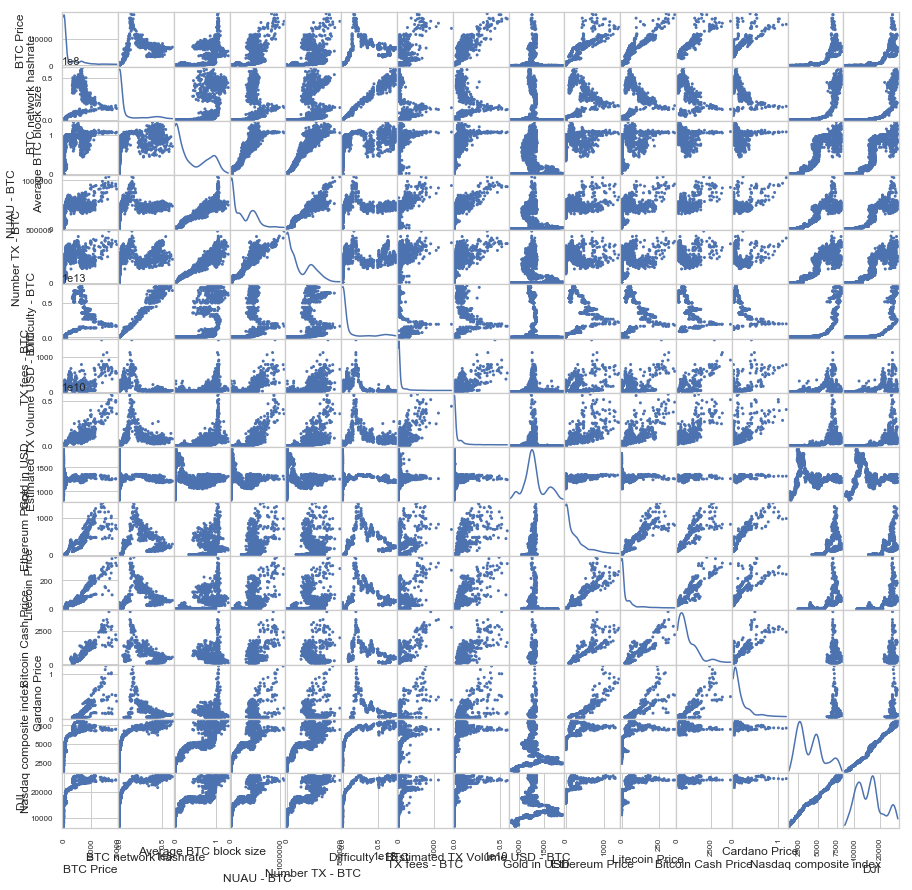

In [5]:
#Checking for correlations and distribution
scatter_matrix(data, alpha = 1.0, figsize = (15, 15), diagonal = 'kde')

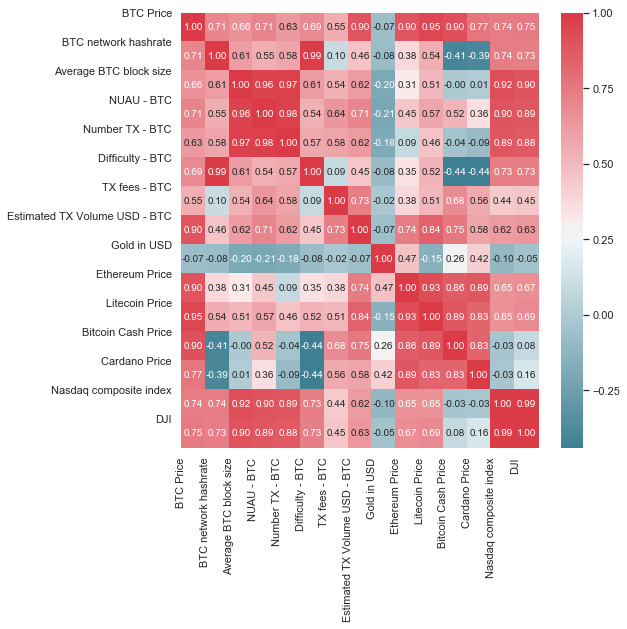

In [7]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

There is no obvious relationships so the data will be further explored. The purpose of this analysis will be to use tools and techniques to transform variables so that the price variable can be predicted. To begin with all variables will be kept and the data will be cleansed.

# Data Cleansing

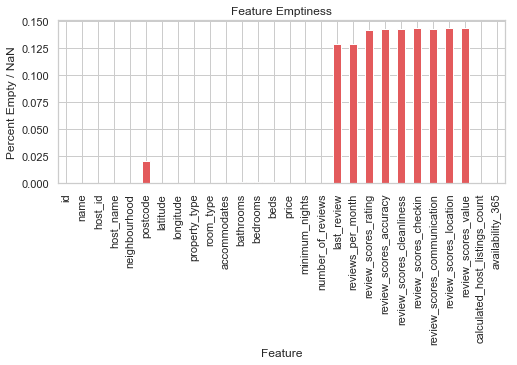

In [56]:
#Visualising the missing data
percentage_missing_data = data.isnull().sum() / data.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (8, 3))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

There are many options to deal with missing data but with such a high number of null values per column, taking an average or median would not be the best option here. Therefore, there are two options available to deal with this missing data; drop the rows containing the null values or drop the columns containing them. As there is a significant number of variables, the columns will be dropped instead of loosing nearly 15% of the data. There will 'number_of_reviews' remaining to represent reviews and other features that represent location, so postcode will also be dropped. Finally, the remaining null values will be dropped.

In [57]:
data=data.drop(['postcode','last_review', 'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value'], axis=1)
data=data.dropna()
data.count()

id                                2367
name                              2367
host_id                           2367
host_name                         2367
neighbourhood                     2367
latitude                          2367
longitude                         2367
property_type                     2367
room_type                         2367
accommodates                      2367
bathrooms                         2367
bedrooms                          2367
beds                              2367
price                             2367
minimum_nights                    2367
number_of_reviews                 2367
calculated_host_listings_count    2367
availability_365                  2367
dtype: int64

Overall only 8 records were sacrificed, there is still 2367. Now categorical columns containing unique values will be explored.

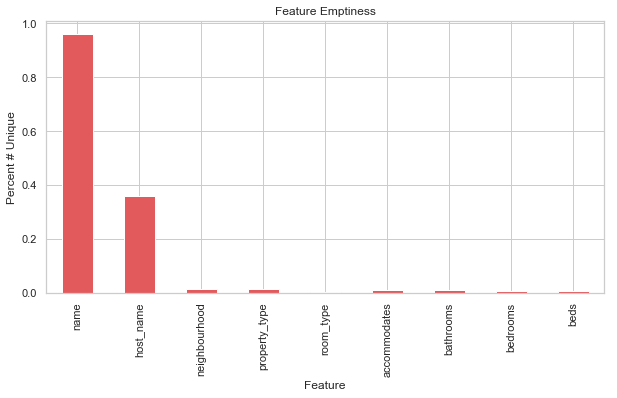

In [58]:
#Checking categorical variables for unique features
categories = data.columns[data.dtypes == 'object']
percentage_unique = data[categories].nunique() / data.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (10, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

The variable 'host_name' will be removed for as a hosts name is irrelevant to the price of accommodation. However, the name variable will be kept as it may be able to be encoded for future analysis and may prove relevant to the price.

In [59]:
data = data.drop(['host_name'], axis=1)

In [60]:
#Checking for unique values in the neighbourhood column
data.neighbourhood.unique()

array(['Windmill Hill', 'Clifton', 'Southville', 'Bedminster', 'Easton',
       'Ashley', 'Redland', 'Brislington West', 'Brislington East',
       'Lawrence Hill', 'Central', 'Eastville', 'Hotwells & Harbourside',
       'St George West', 'St George Central', 'Stoke Bishop',
       'Bishopsworth', 'Henbury & Brentry', 'Lockleaze', 'Cotham',
       'Southmead', 'Westbury-on-Trym & Henleaze', 'Clifton Down',
       'Stockwood', 'Bishopston & Ashley Down', 'Frome Vale',
       'Avonmouth & Lawrence Weston', 'Knowle', 'Horfield', 'Hillfields',
       'St George Troopers Hill', 'Filwood', 'Hengrove & Whitchurch Park',
       'Hartcliffe & Withywood'], dtype=object)

These values are expected to be unique, so no action is taken.

In [61]:
#Checking for unique values in the property_type column
data.property_type.unique()

array(['Townhouse', 'Apartment', 'House', 'Guesthouse',
       'Bed and breakfast', 'Barn', 't', 'Loft', 'Hostel', 'Condominium',
       'Guest suite', 'Cabin', 'Other', 'Tiny house',
       'Serviced apartment', 'Yurt', 'Hut', 'Bungalow', 'Tent', 'f',
       'Boat', 'Hotel', 'Cottage', 'Camper/RV',
       "Shepherd's hut (U.K., France)", '-2.5851114426', 'Boutique hotel',
       'Villa', 'Clifton', 'Farm stay', '-2.6102001818',
       'Casa particular (Cuba)'], dtype=object)

In [62]:
data.property_type.replace({'-2.5851114426': 'Bungalow', '-2.6102001818': 'Loft'}, inplace=True)

There are still a few unique values in this feature, this will be dealt with once the variable is further explored so that it is filled in accurately.

In [63]:
data.accommodates.unique()

array(['2', '4', '3', '14', '1', '5', 'Private room', '8', '9', '6', '10',
       '7', '12', 'Entire home/apt', '16', '11', 'Apartment', '15',
       'City of Bristol', 'Guesthouse', '13'], dtype=object)

These values are inaccurate so will be replaced with a typical number based on the type of accommodation.

In [64]:
data.accommodates.replace({'Private room': 2, 'Entire home/apt': 4, 'Apartment': 4, 'Guesthouse': 4}, inplace=True)
data.loc[data['accommodates'] == 'City of Bristol']

,id,name,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1804,25912522,Roof garden flat on Royal York Crescent,34677671,Clifton,51.455107,-2.618947,Clifton,Entire home/apt,City of Bristol,England,BS8 4JS,Bristol,60,2,2,2,4


In [65]:
data=data.drop(1804)

In [66]:
#Checking for unique values in the accommodates column
data.accommodates.unique()

array(['2', '4', '3', '14', '1', '5', 2, '8', '9', '6', '10', '7', '12',
       4, '16', '11', '15', '13'], dtype=object)

In [67]:
#Checking for unique values in the bathrooms column
data.bathrooms.unique()

array(['1', '2', '3', '1.5', '2.5', '4', '0.5', '5', '0', '4.5', '3.5',
       '8', '7', 'Private room', '12.5', 'Entire home/apt', '6', '6.5'],
      dtype=object)

At first glance the values with .5 could be a mistake but it may also be the case that they have a bathroom with only a shower or toilet, therefore, these will be ignored and the string values replaced. Arguably, a property will not have 8 or 12.5 bathrooms but it may be a hotel or bed and breakfast so this will be kept as it is for now.

In [68]:
data.bathrooms.replace({'Private room': 1, 'Entire home/apt': 2}, inplace=True)

In [69]:
data.bathrooms.unique()

array(['1', '2', '3', '1.5', '2.5', '4', '0.5', '5', '0', '4.5', '3.5',
       '8', '7', 1, '12.5', 2, '6', '6.5'], dtype=object)

In [70]:
data.beds.unique()

array(['1', '2', '10', '3', '4', '5', '6', '7', '8', '14', '16', '13',
       '11', '9', '24', '0', '12'], dtype=object)

Clearly some of these are larger properties such as bed and breakfasts or hotels, it is worth noting that these outliers may prevent relationships forming.

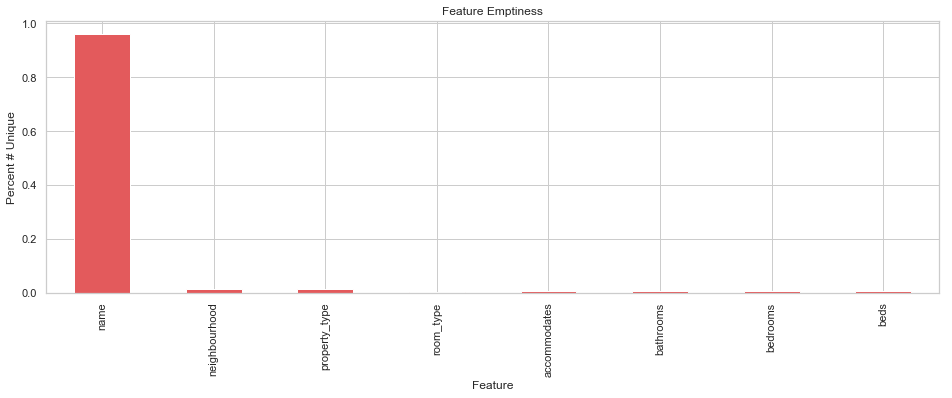

In [71]:
categories = data.columns[data.dtypes == 'object']
percentage_unique = data[categories].nunique() / data.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

The dataset is in much better shape now that the null values and the unique values are removed.

# Further Exploration

The data will now be visualised to see if location has an impact on price. For example, properties closer to the city centre, airport or famous landmarks may cost more, establishing a relationship between price and location.

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-2.7214181506,51.38429863569999,-2.4946350022,51.5325545036&bboxSR=4326&imageSR=4326&size=120000,78448&dpi=96&format=png32&transparent=true&f=image


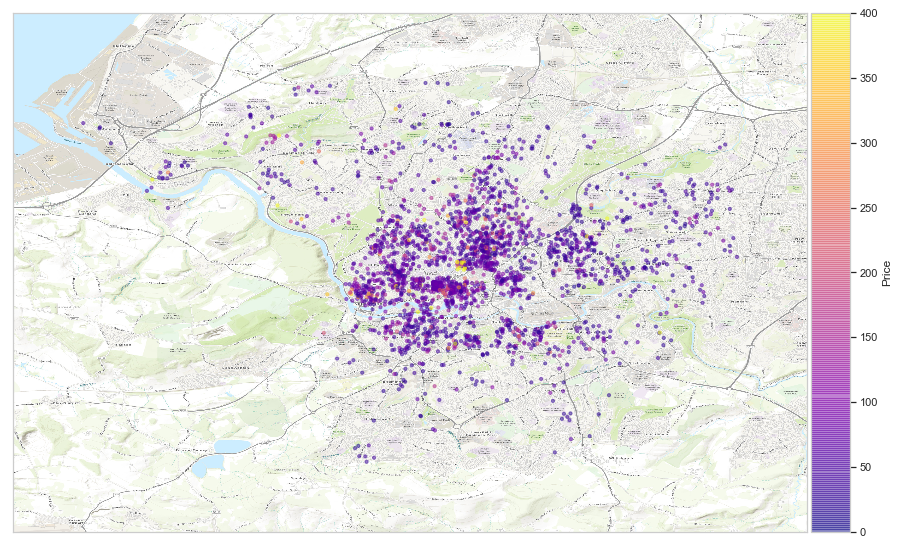

In [72]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(15,15))

long_max = data['longitude'].max() + .02
long_min = data['longitude'].min() -.02
mid_long = (data['longitude'].min() + data['longitude'].max())/2

lat_max = data['latitude'].max() + .02
lat_min = data['latitude'].min() - .02
mid_lat = (data['latitude'].min() + data['latitude'].max())/2


m = Basemap(ax=ax,lat_0=mid_lat,lon_0=mid_long,\
            llcrnrlat=lat_min,urcrnrlat=lat_max,\
            llcrnrlon=long_min,urcrnrlon=long_max,\
            rsphere=6371200.,resolution='h',area_thresh=10)


m.arcgisimage(service='World_Topo_Map', xpixels = 120000, verbose= True)

img=ax.scatter(data['longitude'], data['latitude'],c=data['price'],alpha=0.5, zorder=10 ,s=10, vmax=400,cmap=plt.get_cmap("plasma"))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img, cax=cax, label='Price')

plt.show()

Arguably, the more expensive properties tend to be near the the city centre. The Basemap was plotted to establish if there were any other obvious geographical reasons that affect the price of accommodation. This was worthwhile as there is a major river and a coastline nearby and a relationship may have been found that would have otherwise not. However, in this instance there is no obvious price change geographically, except for the city centre where there is some higher priced properties. 

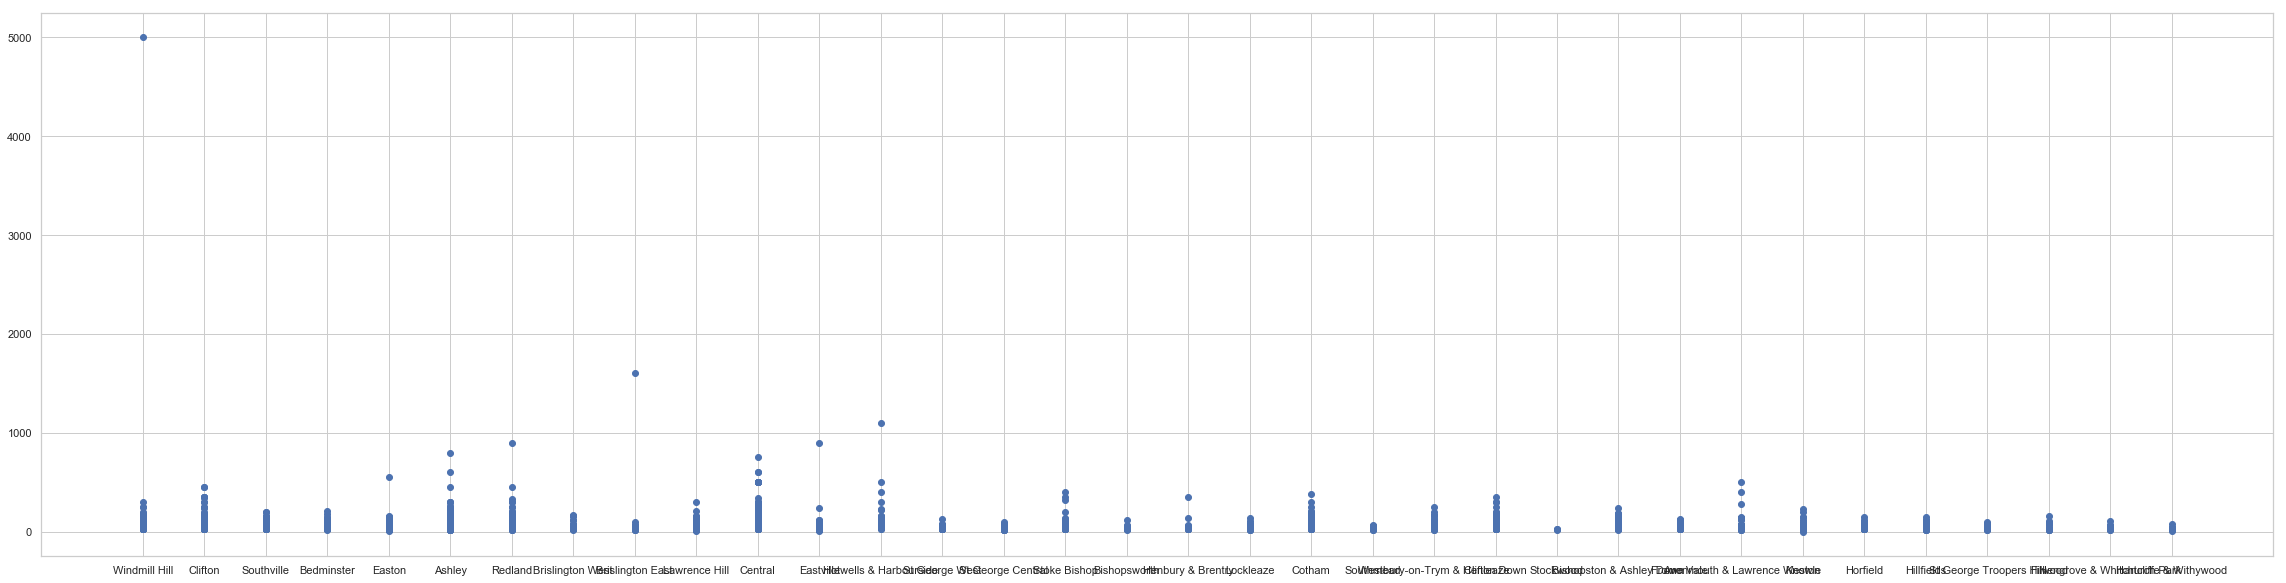

In [73]:
plt.figure(figsize=(40,10))
plt.scatter(data['neighbourhood'], data['price'])

To remove outliers, prices that are more than 4 standard deviations from the mean will be removed.

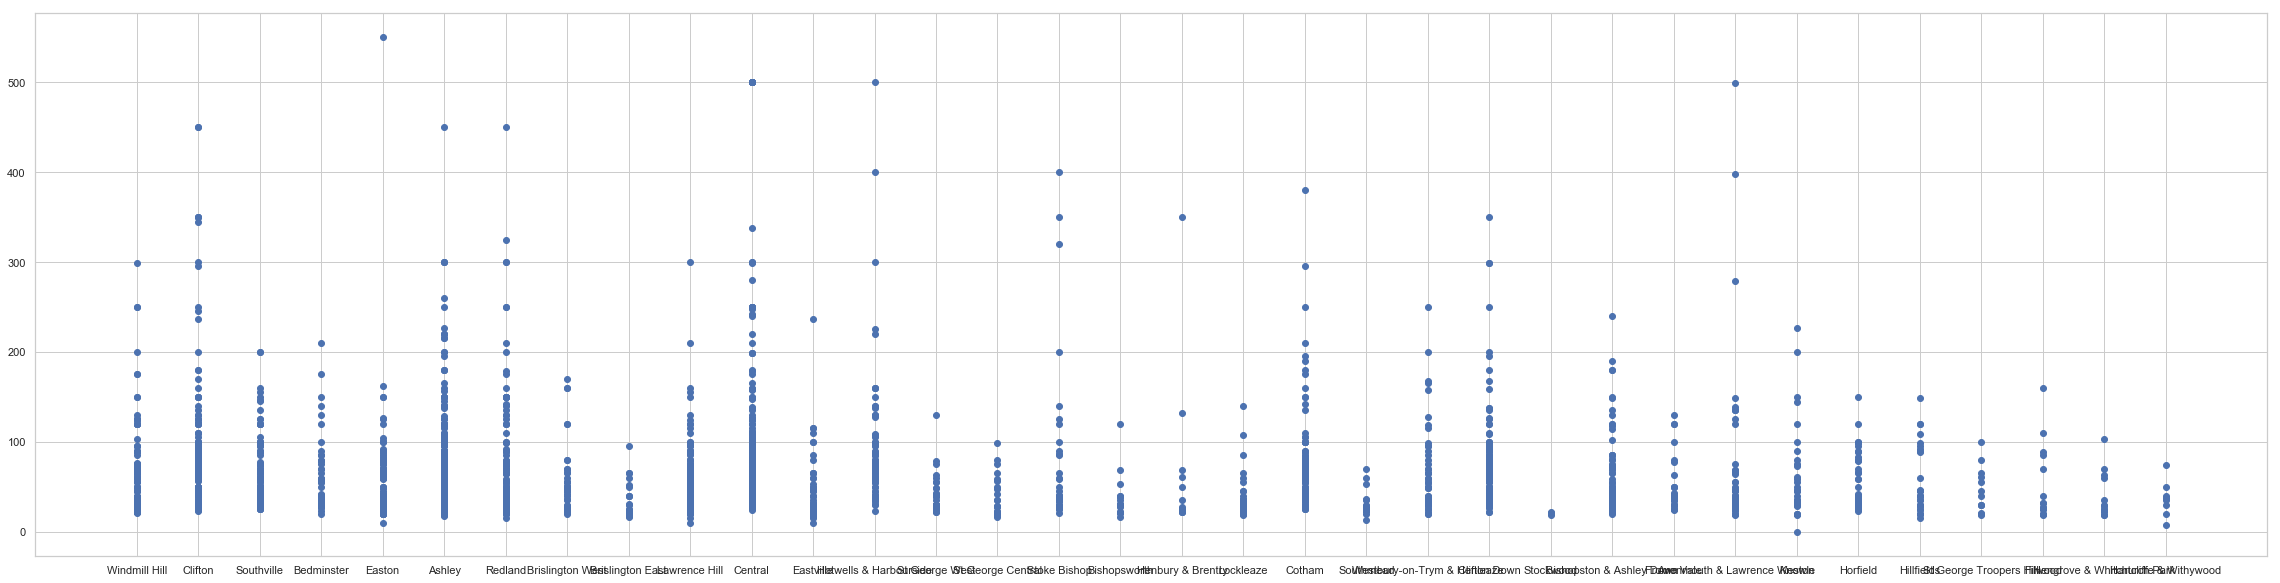

In [74]:
plt.figure(figsize=(40,10))
data = data[np.abs(data.price-data.price.mean())<=(4*data.price.std())]
plt.scatter(data['neighbourhood'],data['price'])

In [75]:
neighbourhoods=data.groupby(['neighbourhood'])
neighbourhoods['price'].mean().sort_values()

neighbourhood
Stockwood                      20.333333
Southmead                      32.176471
Hartcliffe & Withywood         36.625000
Bishopsworth                   37.529412
Lockleaze                      39.485714
Brislington East               39.500000
St George West                 40.000000
St George Central              40.227273
Hengrove & Whitchurch Park     41.250000
Eastville                      45.500000
St George Troopers Hill        45.692308
Filwood                        48.352941
Frome Vale                     51.535714
Easton                         55.552381
Hillfields                     56.206897
Horfield                       56.631579
Brislington West               58.918919
Lawrence Hill                  59.404580
Bedminster                     59.716981
Bishopston & Ashley Down       60.261905
Windmill Hill                  63.017391
Southville                     63.304348
Knowle                         65.500000
Henbury & Brentry              69.833333
We

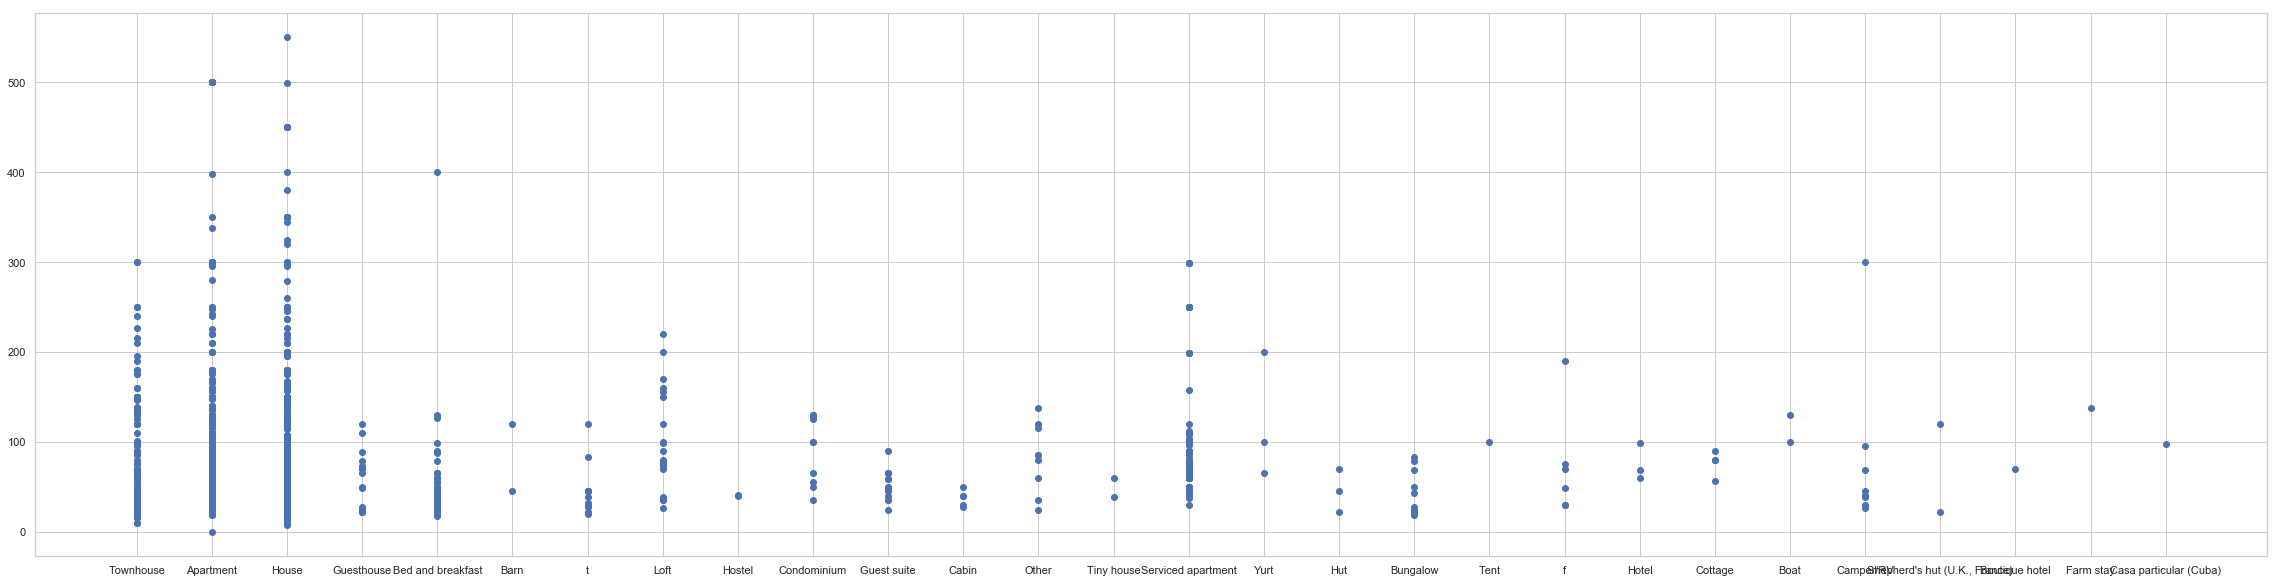

In [76]:
plt.figure(figsize=(40,10))
plt.scatter(data['property_type'], data['price'])

In [77]:
properties=data.groupby(['property_type'])
properties['price'].mean().sort_values()

property_type
Cabin                             37.400000
Bungalow                          40.333333
Hostel                            40.500000
t                                 44.461538
Hut                               45.666667
Tiny house                        49.000000
Guest suite                       52.230769
Bed and breakfast                 54.666667
Guesthouse                        58.785714
Townhouse                         60.246753
House                             67.628606
Camper/RV                         69.272727
Boutique hotel                    70.000000
Shepherd's hut (U.K., France)     71.000000
f                                 73.666667
Hotel                             75.333333
Cottage                           76.500000
Apartment                         77.115468
Serviced apartment                81.213904
Other                             82.333333
Barn                              82.500000
Condominium                       91.800000
Casa particular (C

In [78]:
#Replacing the other unique entries using the nearest property type as a benchmark
data.property_type.replace({'t': 'Hostel', 'f': 'Hotel'}, inplace=True)
properties=data.groupby(['property_type'])
properties['price'].mean().sort_values()

property_type
Cabin                             37.400000
Bungalow                          40.333333
Hostel                            43.933333
Hut                               45.666667
Tiny house                        49.000000
Guest suite                       52.230769
Bed and breakfast                 54.666667
Guesthouse                        58.785714
Townhouse                         60.246753
House                             67.628606
Camper/RV                         69.272727
Boutique hotel                    70.000000
Shepherd's hut (U.K., France)     71.000000
Hotel                             74.222222
Cottage                           76.500000
Apartment                         77.115468
Serviced apartment                81.213904
Other                             82.333333
Barn                              82.500000
Condominium                       91.800000
Casa particular (Cuba)            97.000000
Tent                             100.000000
Loft              

As expected, the type of property and the neighbourhood do have an impact on the price charged. Now that unique values have been removed further relationships will be explored with the objective being to build successful regression models.

# Data Transformation

In [79]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [80]:
#Encoding the categorical variables so they can be used in regression models
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [81]:
datanew=MultiColumnLabelEncoder(columns = ['name','neighbourhood', 'property_type', 'room_type',]).fit_transform(data)

In [82]:
datanew.head()

,id,name,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,70820,517,360195,33,51.439942,-2.591726,24,1,2,1,1,1,27,4,130,5,44
1,117122,503,591555,8,51.450512,-2.610536,0,1,4,2,1,2,65,1,126,1,360
2,146407,2001,708175,26,51.441308,-2.602706,24,1,3,1,1,2,38,2,57,2,46
3,176306,2097,708175,2,51.441006,-2.601208,24,1,2,1,1,1,35,2,30,2,57
4,220956,1247,1145941,2,51.438517,-2.601421,0,0,2,1,1,1,59,1,74,1,253


In [83]:
#Converting the features that are objects to numeric type
datanew = datanew.convert_objects(convert_numeric=True)
datanew.dtypes

id                                  int64
name                                int32
host_id                             int64
neighbourhood                       int32
latitude                          float64
longitude                         float64
property_type                       int32
room_type                           int32
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                                int64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

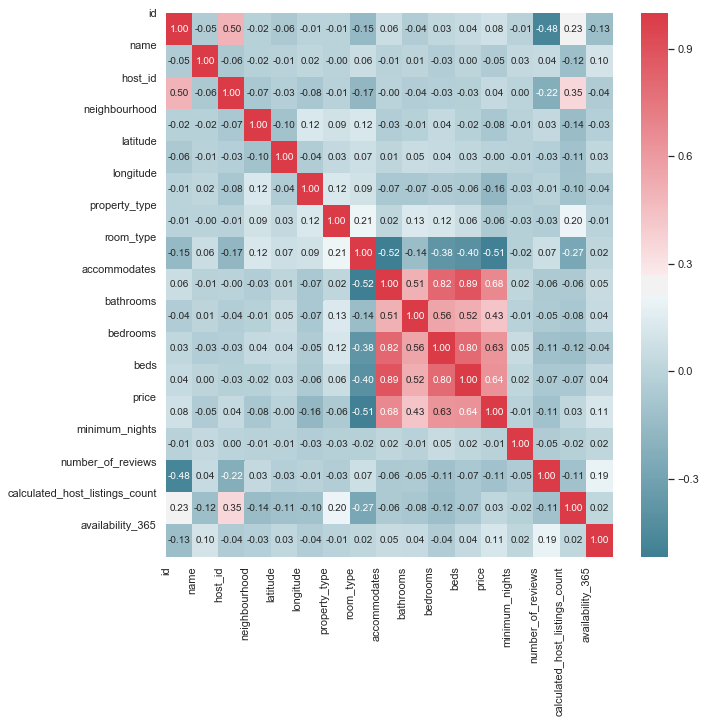

In [84]:
#Checking for any correlations
corr = datanew.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

There are now correlations with 'price' and other variables. This combined with the earlier exploration will now be the logic behind model building. Variables of interest will now be extracted.

In [85]:
#Creating a new dataframe
df=datanew[['neighbourhood']+['latitude']+['longitude']+['property_type']+['room_type']+['accommodates']+['beds']+['price']+['minimum_nights']+['number_of_reviews']+['availability_365']]
df.head()

,neighbourhood,latitude,longitude,property_type,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,availability_365
0,33,51.439942,-2.591726,24,1,2,1,27,4,130,44
1,8,51.450512,-2.610536,0,1,4,2,65,1,126,360
2,26,51.441308,-2.602706,24,1,3,2,38,2,57,46
3,2,51.441006,-2.601208,24,1,2,1,35,2,30,57
4,2,51.438517,-2.601421,0,0,2,1,59,1,74,253


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019791BB72B0>,
      dtype=object)

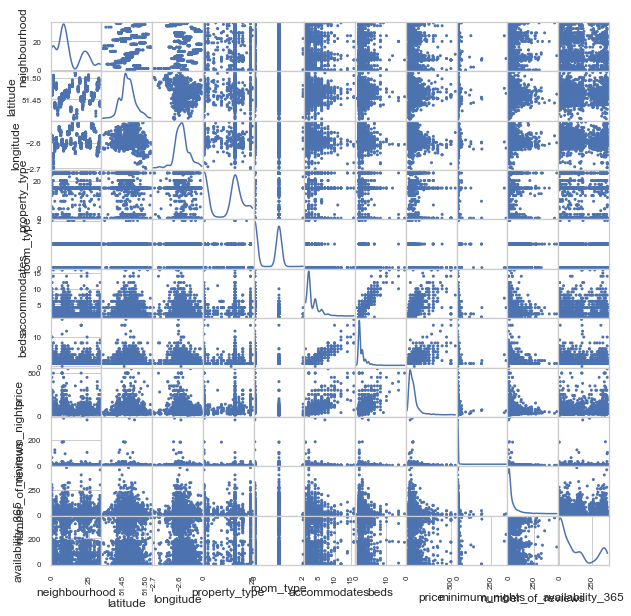

In [86]:
#Checking new dataframe for correlations and distribution
scatter_matrix(df, alpha = 1.0, figsize = (10, 10), diagonal = 'kde')

As the 'price' variable is slightly skewed to the left, this will be transformed using the log function. Other variables will be combined to give new variables, the objective is to find stronger correlations.

In [87]:
#Transforming and combining variables
df['price_log']=np.log(df['price']+1)
df['neighbourhood_property']=df['neighbourhood']+df['property_type']
df['long_lat']=df['longitude']+df['latitude']

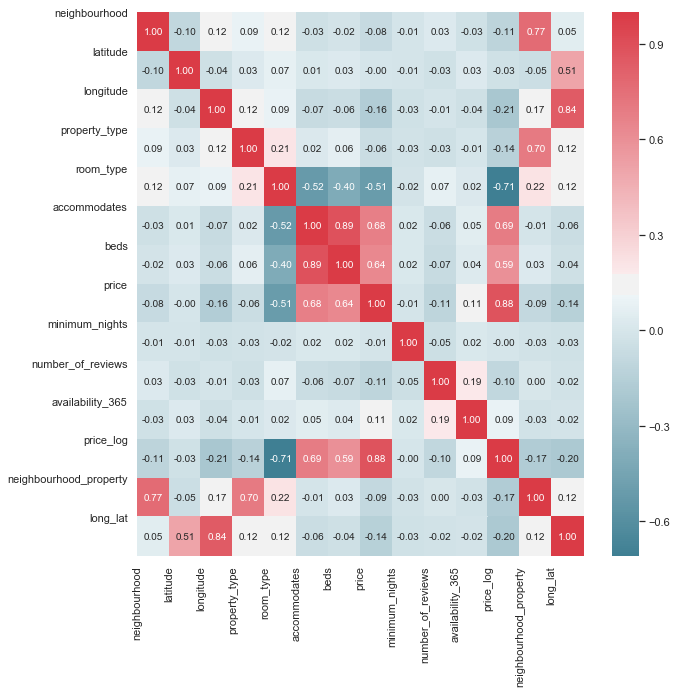

In [88]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Now a decision has to be made to which variables to include in the model. As the 'price_log' has slightly stronger correlations with the new combined variables, this will be the dependent variable as opposed to the 'price' variable. The correlation is still a weak negative one but earlier analysis proved that location and property type did have an impact on average price, therefore, these will be part of the model.

In [89]:
#Further refining dataframe and converting all features to floats
df1=df[['neighbourhood_property']+['room_type']+['accommodates']+['beds']+['price_log']+['long_lat']]
cols= ['neighbourhood_property','room_type','accommodates','beds','price_log', 'long_lat']
for col in cols:
    df1[col] = df1[col].astype(dtype=np.float64)
df1.dtypes

neighbourhood_property    float64
room_type                 float64
accommodates              float64
beds                      float64
price_log                 float64
long_lat                  float64
dtype: object

(array([  1.,   0.,   0.,   4., 110., 776., 856., 459., 106.,  44.]),
 array([0.        , 0.63117348, 1.26234696, 1.89352044, 2.52469392,
        3.1558674 , 3.78704089, 4.41821437, 5.04938785, 5.68056133,
        6.31173481]),
 <a list of 10 Patch objects>)

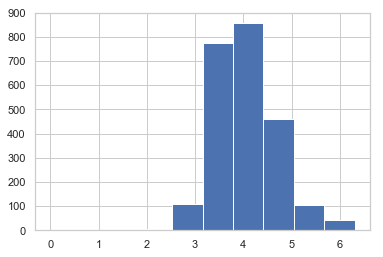

In [90]:
plt.hist(df1['price_log'])

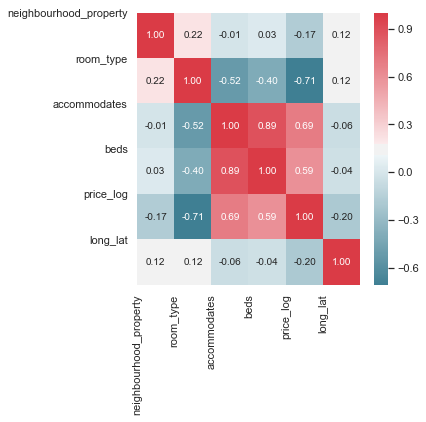

In [91]:
#Visualising final correlations before building regression models
corr = df1.corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Preprocessing Data and Building Regression Models

In [92]:
#Seperating the dependent variable from the independent variables
X=df1.drop(['price_log'], axis=1)
y= df1.iloc[:, 4]

In [93]:
#Scaling the independent variables
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(X)

# Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40) 
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

Coefficients: 
 [-0.03424556 -0.28657019  0.25681211  0.02917345 -0.07236773]
Mean squared error: 0.11
Variance score: 0.69
Mean Absolute Error: 0.24


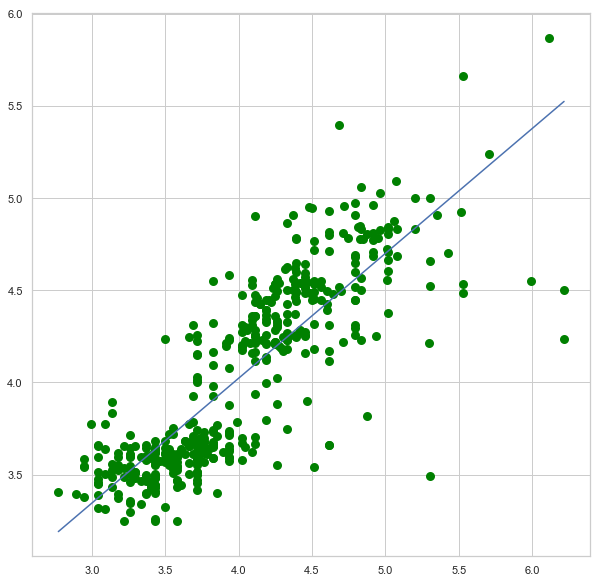

In [145]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))


# Plot outputs
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# Support Vector Machine Linear Regression

In [146]:
from sklearn.svm import LinearSVR
regr = LinearSVR(random_state=0, tol=1e-5)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-0.0296411  -0.3075277   0.25398673  0.02483734 -0.07339829]
Mean squared error: 0.11
Variance score: 0.69
Mean Absolute Error: 0.24


# Decision Tree Regressor

In [147]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

Mean squared error: 0.13
Variance score: 0.65
Mean Absolute Error: 0.26


# Stochastic Gradient Descent Regressor

In [148]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

Mean squared error: 0.12
Variance score: 0.69
Mean Absolute Error: 0.24


# Final Model Selection and FineTuning Parameters

After implementing four regression algorithms, the results are similar. The first two models had a slightly better mean squared error, mean absolute error and a higher variance. Selecting one of the better models, the Support Vector Regression, GridSearchCV will be used to fine-tune the hyper-parameters to find out if a more optimal model can be created using 5-fold cross validation.

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)
# Tuning of parameters for regression by cross-validation
K = 5               # Number of cross valiations

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)
svr_gs.fit(x, y)

# Checking the score for all parameters
print("Grid scores on training set:")
means = svr_gs.cv_results_['mean_test_score']
stds = svr_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    
#Getting best parameters
    
print("The best set of parameters are:")
svr_gs.best_estimator_    

Tuning hyper-parameters
Grid scores on training set:
-0.173 (+/-0.045) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.139 (+/-0.047) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.137 (+/-0.046) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-0.135 (+/-0.047) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.139 (+/-0.047) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
-0.145 (+/-0.045) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-0.147 (+/-0.044) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-0.152 (+/-0.045) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
-0.139 (+/-0.047) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.138 (+/-0.048) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-0.136 (+/-0.046) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-0.140 (+/-0.048) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-0.145 (+/-0.050) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
-0.161 (+/-0.048) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-0.165 (+/-0.049) for {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Mean squared error: 0.11
Variance score: 0.71
Mean Absolute Error: 0.23


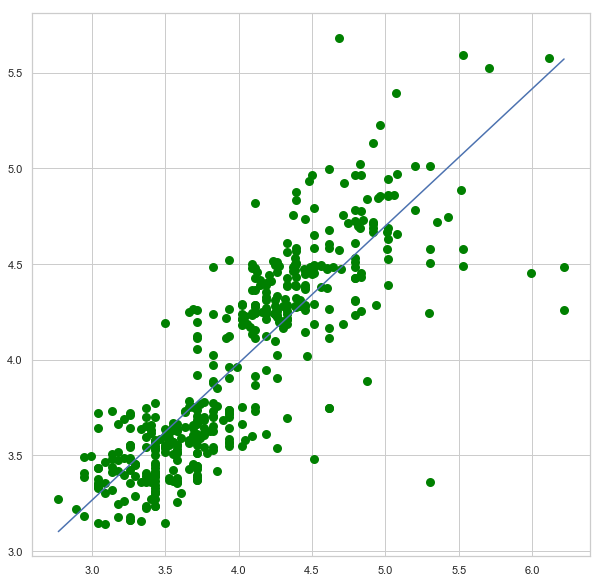

In [151]:
# Implementing model with best parameters
svr = SVR(kernel='rbf', C=1, gamma = 0.1, epsilon = 0.01)
svr.fit(x_train, y_train)
y_pred=svr.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))
# Plot outputs
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

After fine-tuning the hyper-parameters there was a slight reduction in the mean absolute error and a slight improvement in the r-squared value (variance). This model was slightly better than any of the other models, demonstrating how successful parameter tweaking can improve models.   

# Conclusion

This dataset was challenging as it has no natural correlations. It is not groundbreaking that the price of accommodation is related to the area it is located, the type of property it is and how many people it can accommodate etc. However, combining all the features and using machine learning could prove to be highly effective when pricing accommodation optimally, as it can be seen competition is high in the area. For example, it may be that reducing the price by x amount based on this model increases occupancy rates, thus making the accommodation more profitable overall. This would be recommended for further research to test the validity of this model over a 365 day period in relation to the impact that pricing using this model had on occupancy. Also, if a host is seeking to buy a property and is seeking the maximum return on investment, this model could be used to determine the best location and property features to achieve such desire. 

# Limitations

A major limitation of this study was that the dataset had to be cleansed and the outliers removed from the dependent variable. Ideally, a dataset would not require any cleansing, extraction or transformation. However, this is very rarely the case. The GridSearch was only applied to one model to demonstrate the ability of fine-tuning hyperparameters, this could have been implemented on all models to guage if any other algorithms could be fine-tuned to give a more accurate model. It could also be built with less or more variables included in the regression model to determine if the price could be predicted more accurately.  Additionally, the analysis could be done without the larger accommodations and may then be more useful to a typical host because hotels and bed and breakfasts will skew the relationships as they have a lot of underlying factors determining their price. This was commented on through the analysis when the unique values for the beds variable was determined